In [1]:
%pylab inline
import ROOT, rat
import os, sys, pickle
import jp_mpl as jplot
from copy import deepcopy

Populating the interactive namespace from numpy and matplotlib


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


### Setting the directories

In [2]:
# List the files
indir = '/home/jpyanez/snoplus/data/SOC_files'
file_list = os.listdir(indir)
outdir = '/home/jpyanez/snoplus/data/SOC_files_shadow'

In [3]:
# Airplane mode
db = rat.RAT.DB.Get()
db.SetAirplaneModeStatus(True)
db.SetDefaultPlaneLockStatus(False)
print 'This is AIRPLANE MODE - be careful!'

This is AIRPLANE MODE - be careful!


TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DBTableKey is available


### Starting the shadowing calculator

In [4]:
du = rat.utility()
du.LoadDBAndBeginRun()
def wavelengthToEnergy(wavelength): # wl in nm
    hc = 1.2398 #eV * um
    return 1E-3*hc/wavelength # in MeV
light_path = du.GetLightPathCalculator()
shadow_path = du.GetShadowingCalculator()


def isPMTshadowed(source_position,
                 pmt_position,
                 wavelength = 420.,
                 tolerance = 0.):
    laserE = wavelengthToEnergy(wavelength) # This won't matter for direct paths
    shadow_path.SetAllGeometryTolerances(tolerance)
    light_path.CalcByPosition(ROOT.TVector3(source_position),
                              ROOT.TVector3(pmt_position),
                              laserE, 0.)
    return shadow_path.CheckForShadowing(light_path)

### Load the PMT information

In [5]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))


## Doing one example

In [6]:
one_file_name = os.path.join(indir, file_list[0])
reader = rat.socreader(one_file_name)
soc, run = reader.next()

In [7]:
manip_position = soc.calib.GetPos()
wavelength = soc.calib.GetMode()

### Find the shadowed PMTs

In [8]:
# PMTs that are shadowed
shadowed_pmts = np.zeros_like(pmt_info['type'], dtype=bool)
for i in range(1, shadowed_pmts.size):
    shadowed_pmts[i] = isPMTshadowed(manip_position,
                                    pmt_info['xyz'][i],
                                     wavelength=wavelength,
                                    tolerance = 50.)
print np.sum(shadowed_pmts)

1891


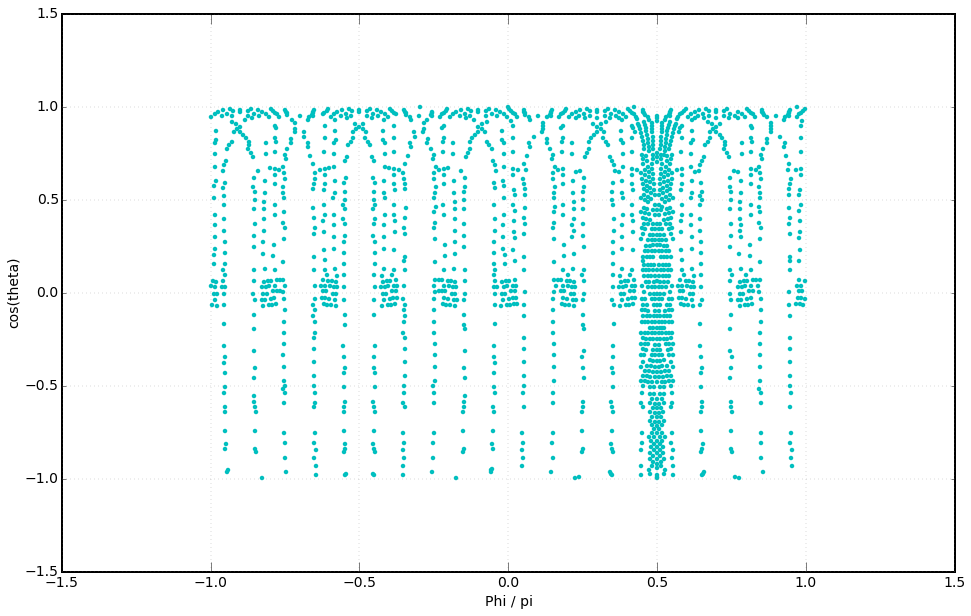

In [9]:
# Plotting the badq pmts
plt.figure(figsize=(16,10))

plt.scatter((pmt_info['phi']/np.pi)[shadowed_pmts], 
            pmt_info['costheta'][shadowed_pmts], 
            c='c',
            marker='o',lw = 0)
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')

## Running over all the files

In [10]:
outdir = '/home/jpyanez/snoplus/data/SOC_shadows'

In [12]:
for iRun in range(len(file_list)):
    one_file_name = os.path.join(indir, file_list[iRun])
    run_number = file_list[iRun][:14]
    
    if os.path.isfile(os.path.join(outdir, run_number + 'pckl')):
        print 'Already done', run_number, '. Skipping ...'
    
    reader = rat.socreader(one_file_name)
    soc, run = reader.next() 
    manip_position = soc.calib.GetPos()
    wavelength = soc.calib.GetMode()
    shadowed_pmts = np.zeros_like(pmt_info['type'], dtype=bool)
    for i in range(1, shadowed_pmts.size):
        shadowed_pmts[i] = isPMTshadowed(manip_position,
                                         pmt_info['xyz'][i],
                                         wavelength=wavelength,
                                         tolerance = 50.)
    print run_number, np.sum(shadowed_pmts), 'shadowed'
    pickle.dump(shadowed_pmts,
               open(os.path.join(outdir, run_number + '.pckl'), 'w'))
    reader.close()

SOC_0000017375 1891 shadowed
SOC_0000017376 1891 shadowed
SOC_0000017377 1891 shadowed
SOC_0000017378 1891 shadowed
SOC_0000017384 1891 shadowed
SOC_0000017386 2266 shadowed
SOC_0000100554 1891 shadowed
SOC_0000100555 1891 shadowed
SOC_0000100556 1891 shadowed
SOC_0000100558 1891 shadowed
SOC_0000100559 1891 shadowed
SOC_0000100560 1891 shadowed
SOC_0000101152 1891 shadowed
SOC_0000101153 1891 shadowed
SOC_0000101154 1891 shadowed
SOC_0000101154 1891 shadowed
SOC_0000101154 1891 shadowed
SOC_0000101154 1891 shadowed
SOC_0000101154 1891 shadowed
SOC_0000101155 1891 shadowed
SOC_0000101158 1891 shadowed
SOC_0000101159 1891 shadowed
SOC_0000101160 1891 shadowed
SOC_0000101161 1891 shadowed
SOC_0000101427 1891 shadowed
SOC_0000101428 1891 shadowed
SOC_0000101432 1891 shadowed
SOC_0000101433 1891 shadowed
SOC_0000101437 1891 shadowed
SOC_0000102518 1891 shadowed
SOC_0000102521 1681 shadowed
SOC_0000102523 2606 shadowed
SOC_0000102526 2606 shadowed
SOC_0000102529 1891 shadowed
SOC_0000102552